<a href="https://colab.research.google.com/github/NenkonPu/DataScienceProjects-in-Madrid/blob/master/ECG_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install heartpy

     |████████████████████████████████| 1.0MB 9.3MB/s 


In [0]:
!unzip /content/dataset_ECG.zip

Archive:  /content/dataset_ECG.zip
replace normal_fantasia/f1o08.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: normal_fantasia/f1o08.txt  
replace __MACOSX/normal_fantasia/._f1o08.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/normal_fantasia/._f1o08.txt  
replace normal_fantasia/f1o09.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: normal_fantasia/f1o09.txt  
  inflating: __MACOSX/normal_fantasia/._f1o09.txt  
  inflating: normal_fantasia/.DS_Store  
  inflating: __MACOSX/normal_fantasia/._.DS_Store  
  inflating: normal_fantasia/f2o06.txt  
  inflating: __MACOSX/normal_fantasia/._f2o06.txt  
  inflating: normal_fantasia/f2o07.txt  
  inflating: __MACOSX/normal_fantasia/._f2o07.txt  
  inflating: normal_fantasia/f2o05.txt  
  inflating: __MACOSX/normal_fantasia/._f2o05.txt  
  inflating: normal_fantasia/f2o04.txt  
  inflating: __MACOSX/normal_fantasia/._f2o04.txt  
  inflating: normal_fantasia/f2o10.txt  
  inflating: __MACOSX/normal_fantasia

In [0]:
import heartpy as hp 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt


## Data Analysis

In [0]:

def Input_ECG(filepath,adu = 2000):
  f = open(file=filepath,mode='r')
  lines = f.readlines()
  f.close()
  out = []
  sep = '\t'
  for line in lines:
    splits = line.split(sep)
    if splits[0] == '\n':
      return out
    tid = int(splits[0])
    value = float (splits[1].replace('\n','')) /adu
    out.append(value)
  return out

def Input_ECG_RAW(filepath):
  f = open(file=filepath,mode='r')
  lines = f.readlines()
  f.close()
  out = []
  sep = '\t'
  for line in lines:
    splits = line.split(sep)
    if splits[0] == '\n':
      return out
    value = int(splits[1].replace('\n','')) 
    out.append(value)
  return out

def Input_R(filepath):
  f = open(file=filepath,mode='r')
  lines = f.readlines()
  out = []
  for line in lines:
    line.replace('\n','')
    out.append(int(line))
  f.close()
  return out





In [0]:
ecg = Input_ECG('/content/dataset_ECG/normal_fantasia/f1o01.txt')
R = Input_R('/content/dataset_ECG/normal_fantasia/R/f1o01_N')

FileNotFoundError: ignored

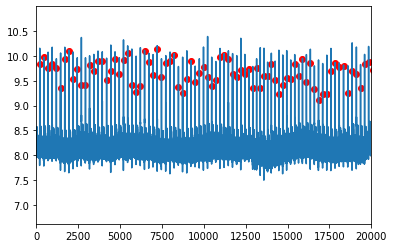

In [0]:
plt.plot(ecg,label='ecg signal')
plt.scatter(R,[ecg[i] for i in R],color='r',label='R peaks')
plt.xlim((0,20000))
plt.show()

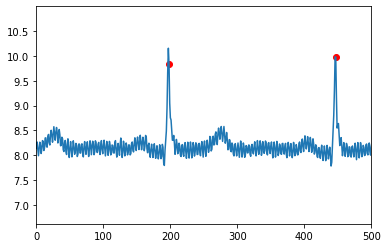

In [0]:
import matplotlib.pyplot as plt
plt.plot(ecg,label='ecg signal')
plt.scatter(R,[ecg[i] for i in R],color='r',label='R peaks')
plt.xlim((0,500))
plt.show()

In [0]:
import pandas as pd 

def R_dic(R,ecg):
  values = [ecg[r] for r in R]
  return {'R_tid':R,'R_peak':values}
r_dic = R_dic(R,ecg)
r_df = pd.DataFrame(r_dic)
r_df.describe()




,R_tid,R_peak
count,125.00000,125.000000
mean,15383.86400,9.689632
std,8724.68926,0.305841
min,198.00000,8.608000
25%,7980.00000,9.508000
50%,15429.00000,9.700000
75%,23010.00000,9.884000
max,29972.00000,10.492000


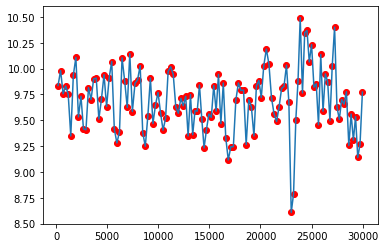

In [0]:
plt.scatter(r_df['R_tid'],r_df['R_peak'],color='r')
plt.plot(r_df['R_tid'],r_df['R_peak'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5400d5e80>,
      dtype=object)

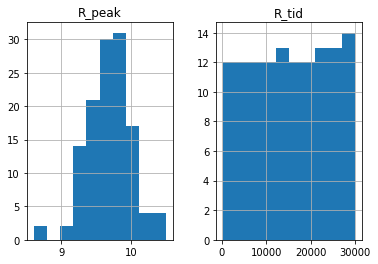

In [0]:
r_df.hist()

In [0]:
def cal_durantion(R):
  out =[]
  for i in range(len(R)-1):
    dt = R[i+1] - R[i]
    out.append(dt)
  return out
dt_list = cal_durantion(R)
dt_df = pd.DataFrame({'duration between R peak':dt_list})
dt_df.describe()


,duration between R peak
count,124.000000
mean,240.112903
std,12.332263
min,213.000000
25%,230.000000
50%,245.000000
75%,250.000000
max,258.000000


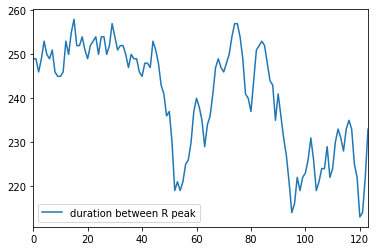

In [0]:
dt_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd53d1dc668>]],
      dtype=object)

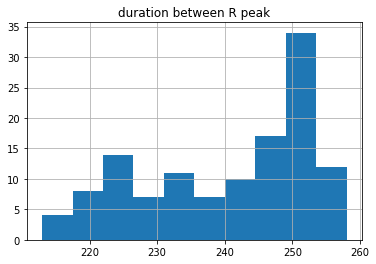

In [0]:
dt_df.hist()

In [0]:
ecg_n =  Input_ECG('/content/dataset_ECG/VF_sddb/41.txt',143)
R_n = Input_R('/content/dataset_ECG/VF_sddb/R/41_N')


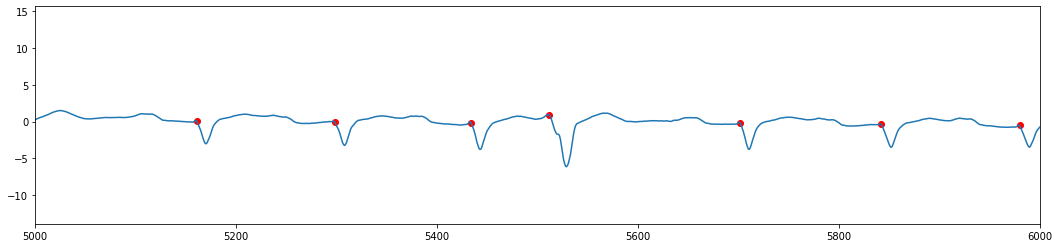

In [0]:
plt.figure(figsize=(18,4))
plt.plot(ecg_n,label='ecg signal')
plt.scatter(R_n,[ecg_n[i] for i in R_n],color='r',label='R peaks')
plt.xlim((5000,6000))
plt.show()

In [0]:
rn_dic = R_dic(R_n,ecg_n)
rn_df = pd.DataFrame(rn_dic)
rn_df.describe()

,R_tid,R_peak
count,208.000000,208.000000
mean,13549.668269,0.180709
std,7819.646311,0.919407
min,83.000000,-1.468531
25%,6746.000000,-0.314685
50%,13672.000000,-0.083916
75%,20431.500000,0.482517
max,26782.000000,4.167832


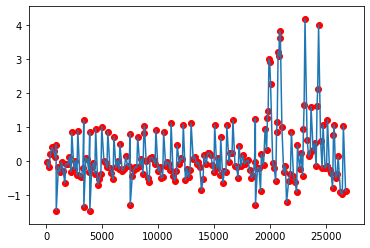

In [0]:
plt.plot(rn_df['R_tid'],rn_df['R_peak'])
plt.scatter(rn_df['R_tid'],rn_df['R_peak'],color='r')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd53d0eff98>,
      dtype=object)

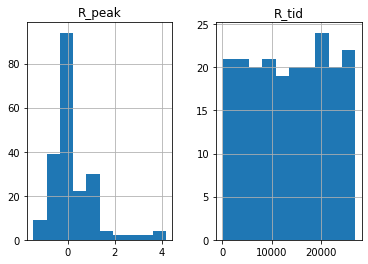

In [0]:
rn_df.hist()

In [0]:
dt_list_n = cal_durantion(R_n)
dt_df_n = pd.DataFrame({'duration between R peak':dt_list_n})
dt_df_n.describe()

,duration between R peak
count,207.000000
mean,128.980676
std,43.430892
min,10.000000
25%,81.000000
50%,137.000000
75%,147.000000
max,205.000000


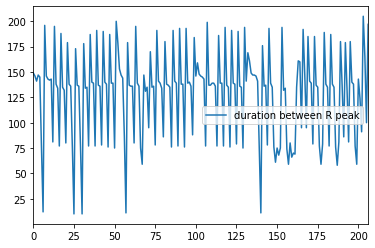

In [0]:
dt_df_n.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3be4f2f208>]],
      dtype=object)

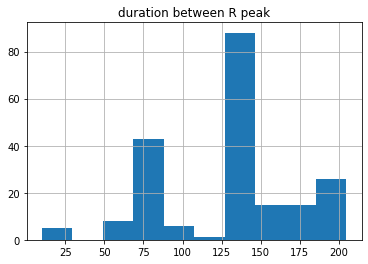

In [0]:
dt_df_n.hist()

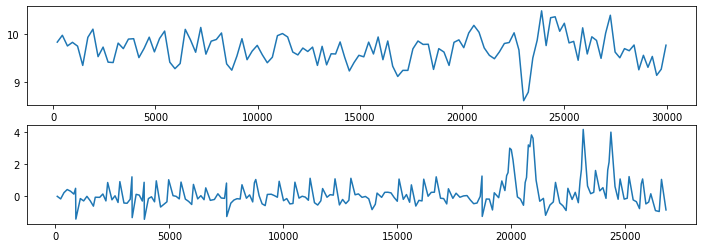

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(r_df['R_tid'],r_df['R_peak'])
plt.subplot(2,1,2)
plt.plot(rn_df['R_tid'],rn_df['R_peak'])
plt.show()

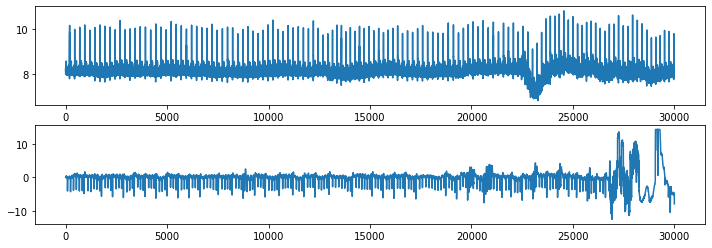

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(ecg)
plt.subplot(2,1,2)
plt.plot(ecg_n)
plt.show()

test heatpy


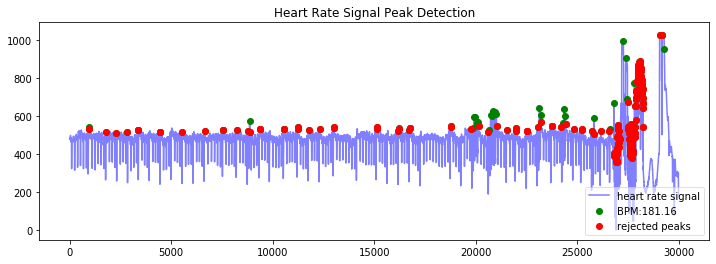

bpm: 181.159420
ibi: 331.200000
sdnn: 143.882915
sdsd: 135.857587
rmssd: 165.080452
pnn20: 0.777778
pnn50: 0.666667
hr_mad: 32.000000
sd1: 104.579582
sd2: 76.297015
s: 25067.113215
sd1/sd2: 1.370690
breathingrate: 0.201288


In [0]:
import heartpy as hp
sample_rate = 250
#run analysis
wd,m = hp.process(hp.scale_data(ecg_n),250)
#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [0]:
ecg_n =  Input_ECG('/content/VF_sddb/41.txt',143)
R_n = Input_R('/content/VF_sddb/R/41_N')

In [0]:
ecg_n =  Input_ECG('/content/normal_fantasia/f1o02.txt',2000)
R_n = Input_R('/content/normal_fantasia/R/f1o02_N')

(0, 3000)

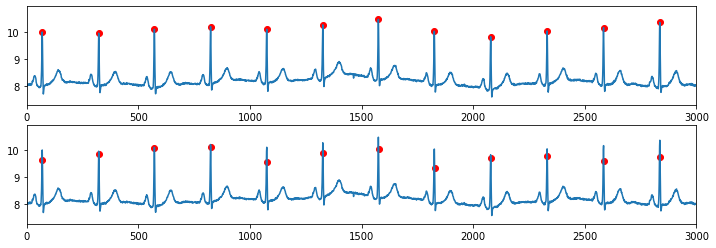

In [0]:
import heartpy as hp
sample_rate = 250
#run analysis
wd,m = hp.process(hp.scale_data(ecg_n),250)
#visualise in plot of custom size
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.scatter(wd['peaklist'],[ecg_n[x]for x in wd['peaklist']],color='r')
plt.plot(ecg_n)
plt.xlim(0,3000)
plt.subplot(2,1,2)
plt.scatter(R_n,[ecg_n[x]for x in R_n],color='r')
plt.plot(ecg_n)
plt.xlim(0,3000)


In [0]:
print(wd['peaklist'])
print(R_n)

[944, 951, 1805, 2293, 2828, 3358, 3359, 4426, 4427, 5511, 6652, 7561, 7563, 8240, 8786, 8865, 8886, 9352, 9357, 10566, 10567, 11227, 11233, 11782, 12321, 13018, 13023, 15132, 15138, 16156, 16214, 16221, 16704, 16762, 16764, 18767, 18776, 19792, 19851, 19928, 19992, 20071, 20133, 20146, 20605, 20662, 20744, 20808, 20880, 20949, 21017, 21036, 21553, 21992, 22000, 22538, 22539, 23070, 23149, 23215, 23233, 23749, 23752, 24226, 24284, 24363, 24424, 24447, 24831, 25220, 25222, 25754, 25827, 25846, 26177, 26584, 26643, 26816, 26837, 26841, 26846, 26932, 26933, 26937, 26942, 26946, 26955, 26959, 26964, 26965, 26973, 26974, 26978, 26987, 26991, 26996, 27000, 27001, 27009, 27014, 27018, 27023, 27027, 27028, 27036, 27037, 27041, 27050, 27063, 27064, 27068, 27073, 27081, 27082, 27086, 27090, 27099, 27259, 27431, 27485, 27489, 27524, 27533, 27542, 27551, 27556, 27592, 27596, 27601, 27605, 27610, 27618, 27619, 27627, 27632, 27633, 27641, 27642, 27646, 27655, 27659, 27668, 27673, 27682, 27686, 27687

Evaluate the performance

In [0]:
import math
def evaluate(predicts,targets,bias = 5):
  p_size = len(predicts)
  t_size = len(targets)
  print('p',p_size)
  print('t',t_size)
  count = 0
  t_pos = 0
  p_pos = 0
  while True:
    if p_pos == p_size - 1 or t_pos == t_size - 1:
      break;
    p = predicts[p_pos]
    t = targets[t_pos]
    dt = p-t
    if math.fabs(dt) < bias :
      #print(p,t,'true')
      count += 1
      p_pos += 1
      t_pos += 1
    else:
      if dt > 0:
        #print(p,t,'false','t_forward')
        t_pos += 1
      else:
        p_pos += 1
        #print(p,t,'false','p_forward')
  precision = count/t_size
  accuracy = count/p_size
  print('precision ',precision,'accuracy ',accuracy )
  return {'precision':precision,
          'accuracy':accuracy }

#evaluate(wd['peaklist'],R_n)



  

In [0]:
file_dic={
    '/content/dataset_ECG/normal_fantasia/f1o01.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o02.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o03.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o04.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o05.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o06.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o07.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o08.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o09.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f1o10.txt':2000,
    '/content/dataset_ECG/normal_fantasia/f2o01.txt':819.2,
    '/content/dataset_ECG/normal_fantasia/f2o02.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o03.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o04.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o05.txt':819.2,
    '/content/dataset_ECG/normal_fantasia/f2o06.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o07.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o08.txt':163.84,
    '/content/dataset_ECG/normal_fantasia/f2o09.txt':409.6,
    '/content/dataset_ECG/normal_fantasia/f2o10.txt':409.6,
    '/content/dataset_ECG/VF_sddb/30.txt':800,
    '/content/dataset_ECG/VF_sddb/31.txt':800,
    '/content/dataset_ECG/VF_sddb/32.txt':800,
    '/content/dataset_ECG/VF_sddb/33.txt':800,
    '/content/dataset_ECG/VF_sddb/34.txt':800,
    '/content/dataset_ECG/VF_sddb/35.txt':800,
    '/content/dataset_ECG/VF_sddb/36.txt':800,
    '/content/dataset_ECG/VF_sddb/37.txt':800,
    '/content/dataset_ECG/VF_sddb/38.txt':800,
    '/content/dataset_ECG/VF_sddb/41.txt':200,
    '/content/dataset_ECG/VF_sddb/44.txt':800,
    '/content/dataset_ECG/VF_sddb/45.txt':800,
    '/content/dataset_ECG/VF_sddb/46.txt':800,
    '/content/dataset_ECG/VF_sddb/48.txt':800,
    '/content/dataset_ECG/VF_sddb/50.txt':800,
    '/content/dataset_ECG/VF_sddb/51.txt':800,
}

R_file_list =[
              '/content/dataset_ECG/normal_fantasia/R/f1o01_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o02_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o03_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o04_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o05_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o06_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o07_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o08_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o09_N',
              '/content/dataset_ECG/normal_fantasia/R/f1o10_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o01_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o02_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o03_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o04_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o05_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o06_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o07_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o08_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o09_N',
              '/content/dataset_ECG/normal_fantasia/R/f2o10_N',
              '/content/dataset_ECG/VF_sddb/R/30_N',
              '/content/dataset_ECG/VF_sddb/R/31_N',
              '/content/dataset_ECG/VF_sddb/R/32_N',
              '/content/dataset_ECG/VF_sddb/R/33_N',
              '/content/dataset_ECG/VF_sddb/R/34_N',
              '/content/dataset_ECG/VF_sddb/R/35_N',
              '/content/dataset_ECG/VF_sddb/R/36_N',
              '/content/dataset_ECG/VF_sddb/R/37_N',
              '/content/dataset_ECG/VF_sddb/R/38_N',
              '/content/dataset_ECG/VF_sddb/R/41_N',
              '/content/dataset_ECG/VF_sddb/R/44_N',
              '/content/dataset_ECG/VF_sddb/R/45_N',
              '/content/dataset_ECG/VF_sddb/R/46_N',
              '/content/dataset_ECG/VF_sddb/R/48_N',
              '/content/dataset_ECG/VF_sddb/R/50_N',
              '/content/dataset_ECG/VF_sddb/R/51_N',
]

## Evaluate  the performance heartpy

In [0]:
i = -1
precision_list = []
accuracy_list = []
for key,value in file_dic.items():
  i += 1
  print(key,value,R_file_list[i])
  ecg = Input_ECG(key,value)
  R = Input_R(R_file_list[i])
  wd,m = hp.process(hp.scale_data(ecg),250)
  metrics = evaluate(wd['peaklist'],R)
  precision_list.append(metrics['precision'])
  accuracy_list.append(metrics['accuracy'])

/content/dataset_ECG/normal_fantasia/f1o01.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o01_N
p 125
t 125
precision  0.992 accuracy  0.992
/content/dataset_ECG/normal_fantasia/f1o02.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o02_N
p 119
t 119
precision  0.9915966386554622 accuracy  0.9915966386554622
/content/dataset_ECG/normal_fantasia/f1o03.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o03_N
p 299
t 125
precision  0.992 accuracy  0.41471571906354515
/content/dataset_ECG/normal_fantasia/f1o04.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o04_N
p 101
t 101
precision  0.9801980198019802 accuracy  0.9801980198019802
/content/dataset_ECG/normal_fantasia/f1o05.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o05_N
p 119
t 115
precision  0.991304347826087 accuracy  0.957983193277311
/content/dataset_ECG/normal_fantasia/f1o06.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o06_N
p 102
t 103
precision  0.9805825242718447 accuracy  0.9901960784313726
/content/dataset_ECG

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


p 328
t 142
precision  0.9929577464788732 accuracy  0.4298780487804878
/content/dataset_ECG/normal_fantasia/f1o09.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o09_N
p 82
t 82
precision  0.9878048780487805 accuracy  0.9878048780487805
/content/dataset_ECG/normal_fantasia/f1o10.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o10_N
p 144
t 144
precision  0.9930555555555556 accuracy  0.9930555555555556
/content/dataset_ECG/normal_fantasia/f2o01.txt 819.2 /content/dataset_ECG/normal_fantasia/R/f2o01_N
p 120
t 120
precision  0.9916666666666667 accuracy  0.9916666666666667
/content/dataset_ECG/normal_fantasia/f2o02.txt 409.6 /content/dataset_ECG/normal_fantasia/R/f2o02_N
p 207
t 107
precision  0.9813084112149533 accuracy  0.5072463768115942
/content/dataset_ECG/normal_fantasia/f2o03.txt 409.6 /content/dataset_ECG/normal_fantasia/R/f2o03_N
p 112
t 112
precision  0.9910714285714286 accuracy  0.9910714285714286
/content/dataset_ECG/normal_fantasia/f2o04.txt 409.6 /content/dataset_ECG/norm

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


p 147
t 145
precision  0.9862068965517241 accuracy  0.9727891156462585
/content/dataset_ECG/VF_sddb/32.txt 800 /content/dataset_ECG/VF_sddb/R/32_N
p 147
t 147
precision  0.9931972789115646 accuracy  0.9931972789115646
/content/dataset_ECG/VF_sddb/33.txt 800 /content/dataset_ECG/VF_sddb/R/33_N
p 329
t 103
precision  0.9902912621359223 accuracy  0.3100303951367781
/content/dataset_ECG/VF_sddb/34.txt 800 /content/dataset_ECG/VF_sddb/R/34_N
p 130
t 130
precision  0.9461538461538461 accuracy  0.9461538461538461
/content/dataset_ECG/VF_sddb/35.txt 800 /content/dataset_ECG/VF_sddb/R/35_N
p 170
t 153
precision  0.9803921568627451 accuracy  0.8823529411764706
/content/dataset_ECG/VF_sddb/36.txt 800 /content/dataset_ECG/VF_sddb/R/36_N
p 123
t 122
precision  0.9754098360655737 accuracy  0.967479674796748
/content/dataset_ECG/VF_sddb/37.txt 800 /content/dataset_ECG/VF_sddb/R/37_N
p 92
t 83
precision  0.9397590361445783 accuracy  0.8478260869565217
/content/dataset_ECG/VF_sddb/38.txt 800 /content/d

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


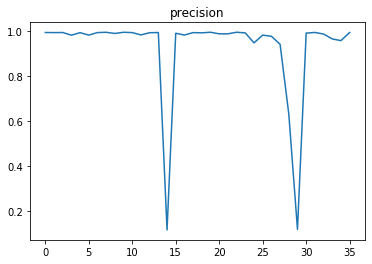

In [0]:
plt.plot(precision_list)
plt.title('precision')
plt.show()

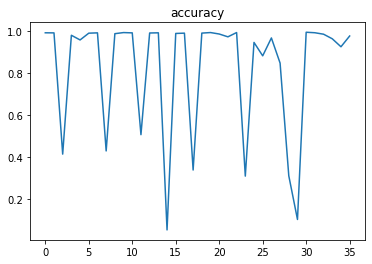

In [0]:
plt.plot(accuracy_list)
plt.title('accuracy')
plt.show()

In [0]:
avg_precision = 0
avg_accuracy = 0
for p in precision_list:
  avg_precision += p
avg_precision /= len(precision_list)
for a in accuracy_list:
  avg_accuracy += a 
avg_accuracy /= len(accuracy_list)
print('average precision',avg_precision,'average accuracy',avg_accuracy)

average precision 0.9260959415135144 average accuracy 0.825738824601405


## Stage 1 generate proposal R peaks  
Input: ECG signal  
Output:Proposal R peaks
* step1: R wave decomposition 
* step2: find peaks  
(first order differentiation with threshold on amplitude and interval)



In [0]:
import numpy as np
from scipy import signal

def generate_proposal_R_peak(ecg):
  r_wave = hp.filter_signal(ecg,cutoff=20,sample_rate=250,order=2,filtertype='lowpass')
  r_wave = hp.smooth_signal(r_wave,250,10,3) 
  r_peaks = signal.find_peaks(r_wave)[0]
  return r_wave,r_peaks


##Stage 2: detect r peaks form the proposals

In [0]:
def R_peaks_correct(r_peaks,r_wave,window_size = 300):
  out = []
  for i in range(len(r_peaks)):
    p = r_peaks[i]
    if check_slope(p,10,r_wave,-0.01):
      if check_amplitude(p,r_wave,window_size,0.88):
        out.append(p)
  return check_interval(r_wave,out)

def check_slope(p,sample_p,r_wave,slope = -0.01):
    sample_pos = p+sample_p
    if sample_pos >= len(r_wave):
     return False
    # consider decsent trend
    k = (r_wave[sample_pos]-r_wave[p])/sample_p
    return k< slope

def check_amplitude(p,r_wave,window_size,rate):
  window_left = p - int(window_size /2)
  window_right = p + int(window_size/2)
  if window_left<0:
    window_left = 0
  if window_right >= len(r_wave):
    window_right = len(r_wave)-1
  mv = max(r_wave[window_left:window_right])
  r = (r_wave[p]+2)/(mv + 2)
  return r > rate

def check_interval(r_wave,out):
  out2 = []
  p1_i = 0
  p2_i = 1
  if len(out)>2:
    while p1_i <len(out) and p2_i < len(out):
      p1 = out[p1_i]
      p2 = out[p2_i]
      dt = p2 - p1
      if dt > 90:
        out2.append(p1)
        p1_i = p2_i
        p2_i = p1_i + 1
      else:
        if r_wave[p2] - r_wave[p1] >0 :
          p1_i = p2_i
          p2_i += 1
        else:
          p2_i += 1
    return out2
  return out




In [0]:
def R_peaks_p1(r_peaks,r_wave,window_size = 250):
  out = []
  for i in range(len(r_peaks)):
    p = r_peaks[i]
    if check_slope(p,10,r_wave,-0.01):
        out.append(p)
  return out
  
def R_peaks_p2(r_peaks,r_wave,window_size = 250):
  out = []
  for i in range(len(r_peaks)):
    p = r_peaks[i]
    if check_slope(p,10,r_wave,-0.01):
      if check_amplitude(p,r_wave,window_size,0.88):
        out.append(p)
  return out


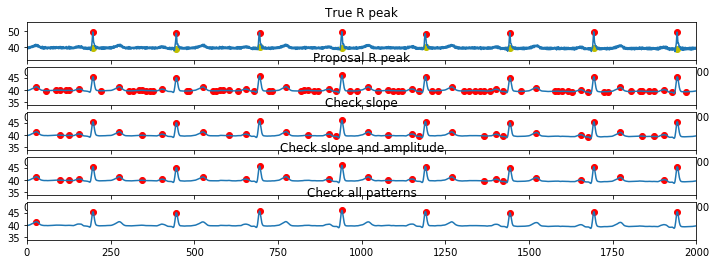

1307
p 129
t 125
precision  0.984 accuracy  0.9534883720930233


{'accuracy': 0.9534883720930233, 'precision': 0.984}

In [0]:
ecg = Input_ECG('/content/dataset_ECG/normal_fantasia/f1o01.txt',409.6)
R = Input_R('/content/dataset_ECG/normal_fantasia/R/f1o01_N')
bp_ecg,peaks = generate_proposal_R_peak(ecg)


plt.figure(figsize=(12,4))
plt.subplot(5,1,1)
plt.plot(ecg)
plt.scatter(R,[ecg[i-1] for i in R],color='r')
plt.scatter(R[:10],[ecg[i+10] for i in R[:10]],color='y')
plt.title('True R peak')
plt.xlim((0,2000))
plt.subplot(5,1,2)
plt.scatter(peaks,[bp_ecg[i] for i in peaks],color='r')
plt.plot(bp_ecg)
plt.title('Proposal R peak')
plt.xlim((0,2000))

peaks_corrected = R_peaks_p1(peaks,bp_ecg)
plt.subplot(5,1,3)
plt.scatter(peaks_corrected,[bp_ecg[i] for i in peaks_corrected],color='r')
plt.plot(bp_ecg)
plt.xlim((0,2000))
plt.title('Check slope')

peaks_corrected = R_peaks_p2(peaks,bp_ecg)
plt.subplot(5,1,4)
plt.scatter(peaks_corrected,[bp_ecg[i] for i in peaks_corrected],color='r')
plt.plot(bp_ecg)
plt.xlim((0,2000))
plt.title('Check slope and amplitude')

peaks_corrected = R_peaks_correct(peaks,bp_ecg)
plt.subplot(5,1,5)
plt.scatter(peaks_corrected,[bp_ecg[i] for i in peaks_corrected],color='r')
plt.plot(bp_ecg)
plt.xlim((0,2000))
plt.title('Check all patterns')

plt.show()
print(len(peaks))
evaluate(peaks_corrected,R)


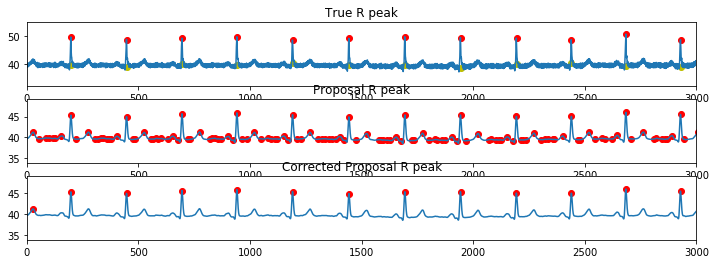

1307
p 129
t 125
precision  0.984 accuracy  0.9534883720930233


{'accuracy': 0.9534883720930233, 'precision': 0.984}

In [0]:
ecg = Input_ECG('/content/dataset_ECG/normal_fantasia/f1o01.txt',409.6)
R = Input_R('/content/dataset_ECG/normal_fantasia/R/f1o01_N')
bp_ecg,peaks = generate_proposal_R_peak(ecg)
peaks_corrected = R_peaks_correct(peaks,bp_ecg)

plt.figure(figsize=(12,4))
plt.subplot(3,1,1)
plt.plot(ecg)
plt.scatter(R,[ecg[i-1] for i in R],color='r')
plt.scatter(R[:100],[ecg[i+10] for i in R[:100]],color='y')
plt.title('True R peak')
plt.xlim((0,3000))
plt.subplot(3,1,2)
plt.scatter(peaks,[bp_ecg[i] for i in peaks],color='r')
plt.plot(bp_ecg)
plt.title('Proposal R peak')
plt.xlim((0,3000))
plt.subplot(3,1,3)
plt.scatter(peaks_corrected,[bp_ecg[i] for i in peaks_corrected],color='r')
plt.plot(bp_ecg)
plt.xlim((0,3000))
plt.title('Corrected Proposal R peak')
plt.show()
print(len(peaks))
evaluate(peaks_corrected,R)

## Evaluate the performance


In [0]:
i = -1
precision_list = []
accuracy_list = []
for key,value in file_dic.items():
  i += 1
  print(key,value,R_file_list[i])
  ecg = Input_ECG(key,value)
  R = Input_R(R_file_list[i])
  bp_ecg,peaks = generate_proposal_R_peak(ecg)
  peaks_corrected = R_peaks_correct(peaks,bp_ecg)
  metrics = evaluate(peaks_corrected ,R)
  precision_list.append(metrics['precision'])
  accuracy_list.append(metrics['accuracy'])



/content/dataset_ECG/normal_fantasia/f1o01.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o01_N
p 126
t 125
precision  0.984 accuracy  0.9761904761904762
/content/dataset_ECG/normal_fantasia/f1o02.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o02_N
p 118
t 119
precision  0.9831932773109243 accuracy  0.9915254237288136
/content/dataset_ECG/normal_fantasia/f1o03.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o03_N
p 125
t 125
precision  0.832 accuracy  0.832
/content/dataset_ECG/normal_fantasia/f1o04.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o04_N
p 101
t 101
precision  0.9801980198019802 accuracy  0.9801980198019802
/content/dataset_ECG/normal_fantasia/f1o05.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o05_N
p 116
t 115
precision  0.991304347826087 accuracy  0.9827586206896551
/content/dataset_ECG/normal_fantasia/f1o06.txt 2000 /content/dataset_ECG/normal_fantasia/R/f1o06_N
p 102
t 103
precision  0.9805825242718447 accuracy  0.9901960784313726
/content/dataset_ECG

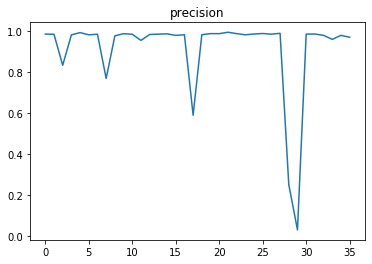

In [0]:
plt.plot(precision_list)
plt.title('precision')
plt.show()

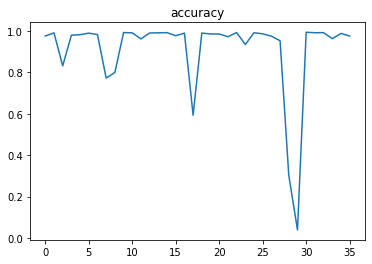

In [0]:
plt.plot(accuracy_list)
plt.title('accuracy')
plt.show()

In [0]:
avg_precision = 0
avg_accuracy = 0
for p in precision_list:
  avg_precision += p
avg_precision /= len(precision_list)
for a in accuracy_list:
  avg_accuracy += a 
avg_accuracy /= len(accuracy_list)
print('average precision',avg_precision,'average accuracy',avg_accuracy)

average precision 0.9134914721996046 average accuracy 0.9115363471555056


heartpy:  
average precision 0.9260959415135144 average accuracy 0.825738824601405  
ours:  
average precision 0.9134914721996046 average accuracy 0.9115363471555056